# SyriaTel Customer Churn Predictive Model

TABLE OF CONTENTS

1. About This Project
- What is the purpose of this project?
2. EDA
- Initial Imports
- Dataframe info and visualizations
- Target
- Other Features
3. Modeling
- Dummy Model
- Logistic Regression Model
- KNN Model
- Random Forest Model
- Grid Search



# About This Project

The purpose of this project is to examine a data set of customer churn data for SyriaTel Communications and make a predictive model that can anticipate customers that are likely to churn(stop being a customer). The stakeholders are the executive team at SyriaTel.

We will be exploring a number of features to see how they are related to churn.
1. Minutes Usage and Spend
2. Account Features such as Voicemail and having an Internation Plan
3. Use of Customer Service
4. Location
5. Account Length

And More

# EDA

In [112]:
# Run these imports
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, FunctionTransformer
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, \
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, \
f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

from IPython.display import display

import xgboost

%matplotlib inline

In [113]:
df = pd.read_csv("./data/customer_churn.csv")

In [114]:
#using Ian Butler's exploratory eda function with some minor tweaks

def eda(df):
    print("\ndf head: ")
    display(df.head().T)
    print("\ndf tail: ")
    display(df.tail().T)
    print("\ndf info: ")
    display(df.info())
    print("\ndf shape: ")
    display(df.shape)
    print("\ndf size: ")
    display(df.size)
    print("\ndf ndim: ")
    display(df.ndim)
    print("\ndf describe: ")
    display(df.describe())
    print("\ndf sample: ")
    display(df.sample(random_state=42))
    print("\ndf isnull sum: ")
    display(df.isnull().sum())
    print("\ndf nunique: ")
    display(df.nunique())
    print("\ndf index: ")
    display(df.index)
    print("\ndf columns: ")
    display(df.columns)
    print("\ndf memory usage: ")
    display(df.memory_usage())
    print("\ndf duplicated sum: ")
    display(df.duplicated().sum())
    print("\ndf corr: ")
    display(df.corr())
    print("\ndf dtypes: ")
    display(df.dtypes)
    print("\ndf corr heatmap: ")
    fig, ax = plt.subplots(figsize=(16,12))
    display(sns.heatmap(df.corr(), annot=True))


df head: 


0         1         2         3         4
state                         KS        OH        NJ        OH        OK
account length               128       107       137        84        75
area code                    415       415       415       408       415
phone number            382-4657  371-7191  358-1921  375-9999  330-6626
international plan            no        no        no       yes       yes
voice mail plan              yes       yes        no        no        no
number vmail messages         25        26         0         0         0
total day minutes          265.1     161.6     243.4     299.4     166.7
total day calls              110       123       114        71       113
total day charge           45.07     27.47     41.38      50.9     28.34
total eve minutes          197.4     195.5     121.2      61.9     148.3
total eve calls               99       103       110        88       122
total eve charge           16.78     16.62      10.3      5.26     12.61
total night minutes        244.7     254.4     162.6     196.9     186.9
total night calls             91       103       104        89       121
total night charge         11.01     11.45      7.32      8.86      8.41
total intl minutes            10      13.7      12.2       6.6      10.1
total intl calls               3         3         5         7         3
total intl charge            2.7       3.7      3.29      1.78      2.73
customer service calls         1         1         0         2         3
churn                      False     False     False     False     False


df tail: 


3328      3329      3330      3331      3332
state                         AZ        WV        RI        CT        TN
account length               192        68        28       184        74
area code                    415       415       510       510       415
phone number            414-4276  370-3271  328-8230  364-6381  400-4344
international plan            no        no        no       yes        no
voice mail plan              yes        no        no        no       yes
number vmail messages         36         0         0         0        25
total day minutes          156.2     231.1     180.8     213.8     234.4
total day calls               77        57       109       105       113
total day charge           26.55     39.29     30.74     36.35     39.85
total eve minutes          215.5     153.4     288.8     159.6     265.9
total eve calls              126        55        58        84        82
total eve charge           18.32     13.04     24.55     13.57      22.6
total night minutes        279.1     191.3     191.9     139.2     241.4
total night calls             83       123        91       137        77
total night charge         12.56      8.61      8.64      6.26     10.86
total intl minutes           9.9       9.6      14.1         5      13.7
total intl calls               6         4         6        10         4
total intl charge           2.67      2.59      3.81      1.35       3.7
customer service calls         2         3         2         2         0
churn                      False     False     False     False     False


df info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 

None


df shape: 


(3333, 21)


df size: 


69993


df ndim: 


2


df describe: 


account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000


df sample: 


state  account length  area code phone number international plan  \
438    WY             113        510     352-6573                 no   

    voice mail plan  number vmail messages  total day minutes  \
438              no                      0              155.0   

     total day calls  total day charge  ...  total eve calls  \
438               93             26.35  ...              106   

     total eve charge  total night minutes  total night calls  \
438              28.1                189.4                123   

     total night charge  total intl minutes  total intl calls  \
438                8.52                13.5                 3   

     total intl charge  customer service calls  churn  
438               3.65                       1  False  

[1 rows x 21 columns]


df isnull sum: 


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


df nunique: 


state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64


df index: 


RangeIndex(start=0, stop=3333, step=1)


df columns: 


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


df memory usage: 


Index                       128
state                     26664
account length            26664
area code                 26664
phone number              26664
international plan        26664
voice mail plan           26664
number vmail messages     26664
total day minutes         26664
total day calls           26664
total day charge          26664
total eve minutes         26664
total eve calls           26664
total eve charge          26664
total night minutes       26664
total night calls         26664
total night charge        26664
total intl minutes        26664
total intl calls          26664
total intl charge         26664
customer service calls    26664
churn                      3333
dtype: int64


df duplicated sum: 


0


df corr: 


account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl minutes            0.009514  -0.018288               0.002856   
total intl calls              0.020661  -0.024179               0.013957   
total intl charge             0.009546  -0.018395               0.002884   
customer service calls       -0.003796   0.027572              -0.013263   
churn                         0.016541   0.006174              -0.089728   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
area code                       -0.008264        -0.009646         -0.008264   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   
churn                            0.205151         0.018459          0.205151   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
area code                        0.003580        -0.011886          0.003607   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes              -0.011035         0.008703         -0.011043   
total intl calls                 0.002541         0.017434          0.002541   
total intl cha


df dtypes: 


state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


df corr heatmap: 


<AxesSubplot:>

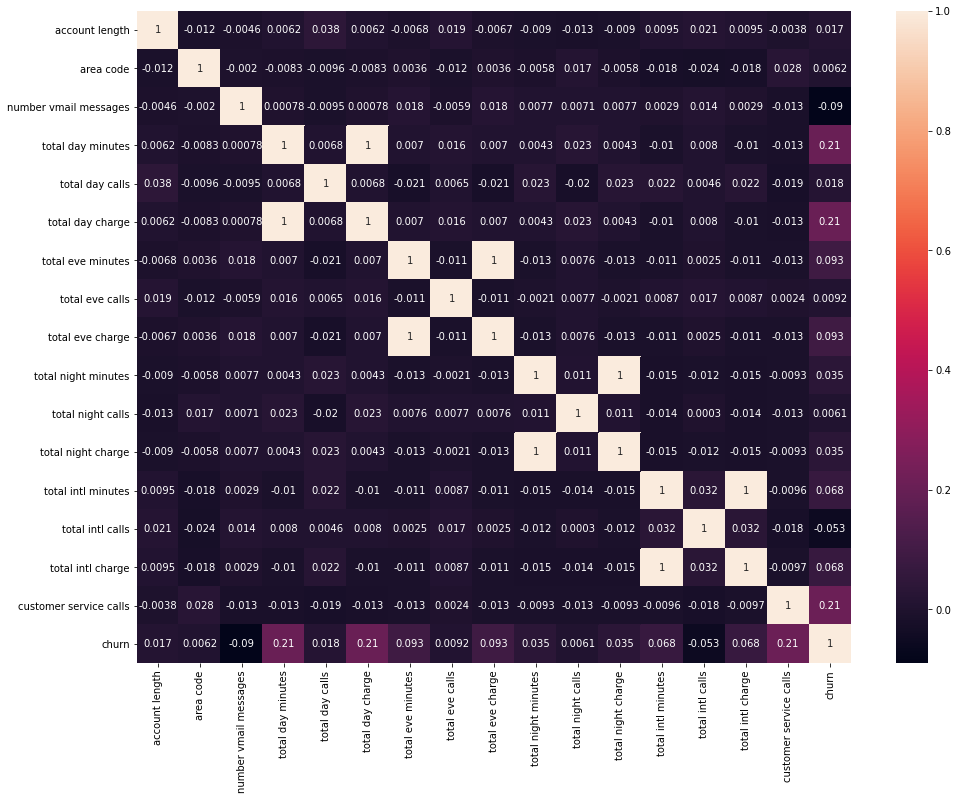

In [115]:
eda(df)

# Initial EDA Notes

1. There are 3 object rows and our target is a boolean. 

2. Converting churn to an int.

3. We will drop phone number and convert phone number and international plan which are yes and no to 1 and 0.

4. There are no nulls that we will need to drop and no duplicated rows.

5. Currently the column titles have a space between them. Will replace with _ .

6. There are 51 unique state values. Will explore, expecting DC.

7. No strong correlations uncovered.

In [116]:
#Changing our target variable to an int from bool
df['churn'] = df['churn'].astype(int)

#Replacing spaces between column names with _
df.columns = [c.replace(' ', '_') for c in df]

#dropping phone number
df = df.drop('phone_number', axis=1)

#Will need to change objects later
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [117]:
#Confirming DC is state 51 as opposed to typo.
df.state.value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NC     68
NJ     68
NV     66
WA     66
CO     66
RI     65
MA     65
MS     65
AZ     64
MO     63
FL     63
ME     62
NM     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

# FURTHER EDA OPTION

(NOT REQUIRED)

The below two cells can be run for additional information by uncommenting.

Note: It may take up to several minutes to run.

If needed: pip install pandas-profiling 

In [118]:
#profile = ProfileReport(df, title="Customer Data")


In [119]:
#profile.to_notebook_iframe()

# Understanding our Features

1. Churn
2. Minutes Usage and Spend
3. Use of Customer Service
4. Account Features such as Voicemail and having an Internation Plan
5. Location

We will look at other things like Account Length along the way.

# Churn
Let's look at the value counts for our target variable churn to get an idea of the distribution and what a dummy model using most frequent would predict for accuracy

In [120]:
# A most frequent model would predict at 86%
df.churn.value_counts(), df.churn.value_counts(normalize=True)

(0    2850
 1     483
 Name: churn, dtype: int64,
 0    0.855086
 1    0.144914
 Name: churn, dtype: float64)

/Users/kellymullaney/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

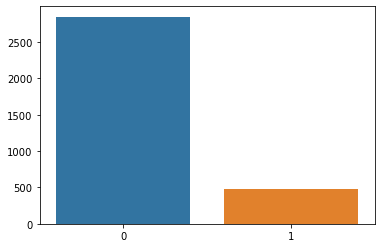

In [121]:
#Simple bar chart of our current customer and churned customer counts.
target = df["churn"].value_counts()
sns.barplot(target.index, target.values)

In [122]:
df.groupby(['churn']).mean()

account_length   area_code  number_vmail_messages  total_day_minutes  \
churn                                                                         
0          100.793684  437.074737               8.604561         175.175754   
1          102.664596  437.817805               5.115942         206.914079   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
churn                                                                          
0           100.283158         29.780421         199.043298       100.038596   
1           101.335404         35.175921         212.410145       100.561077   

       total_eve_charge  total_night_minutes  total_night_calls  \
churn                                                             
0             16.918909           200.133193         100.058246   
1             18.054969           205.231677         100.399586   

       total_night_charge  total_intl_minutes  total_intl_calls  \
churn                                                             
0                9.006074           10.158877          4.532982   
1                9.235528           10.700000          4.163561   

       total_intl_charge  customer_service_calls  
churn                                             
0               2.743404                1.449825  
1               2.889545                2.229814

Text(0.5, 1.0, 'Account Length vs Churn')

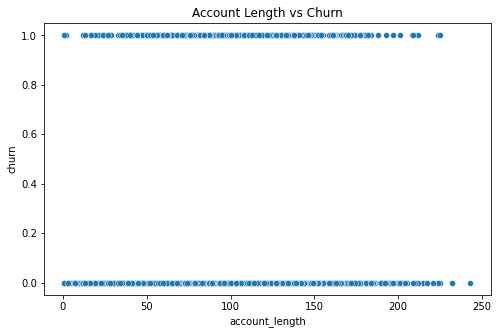

In [123]:
#Looking at account lenth vs the spread of churn outcome
plt.figure(figsize=(8,5))
sns.scatterplot(x='account_length', y='churn', data=df, palette='rainbow')
plt.title("Account Length vs Churn")

# Churn Notes
Customers who churn:

-make 50% more customer service calls

-don't use voicemail feature as much

-spend almost 20% more on day charges

-spend more in every category

# Additional Features

We are going to look further at some of the features for differences between current and churned customers

# Cost and Minutes Used

In [124]:
#Creating Financial DF to create new features that we don't want in our model later
#These features are just being created to easily look at things like spend in totality
fin_df = df.copy(deep=True)

In [125]:
#costs per minute by time
day_cost_min = fin_df['total_day_charge'].sum() / fin_df['total_day_minutes'].sum()
eve_cost_min = fin_df['total_eve_charge'].sum() / fin_df['total_eve_minutes'].sum()
night_cost_min = fin_df['total_night_charge'].sum() / fin_df['total_night_minutes'].sum()
intl_cost_min = fin_df['total_intl_charge'].sum() / fin_df['total_intl_minutes'].sum()
print(f"Daytime cost per minute {day_cost_min}")
print(f"Evening cost per minute {eve_cost_min}")
print(f"Nighttime cost per minute {night_cost_min}")
print(f"International cost per minute {intl_cost_min}")

Daytime cost per minute 0.17000300739130672
Evening cost per minute 0.0850010487148578
Nighttime cost per minute 0.04500041448440008
International cost per minute 0.2700500279887107


In [126]:
#Creating Total Charge and Total Minutes
fin_df['total_charge'] = fin_df.loc[:, ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']].sum(axis=1)
fin_df['total_minutes'] = fin_df.loc[:, ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']].sum(axis=1)

In [127]:
#Creating Charge Per Minute
fin_df['charge_per_minute'] = fin_df['total_charge'] / fin_df['total_minutes']

In [128]:
fin_df

state  account_length  area_code international_plan voice_mail_plan  \
0       KS             128        415                 no             yes   
1       OH             107        415                 no             yes   
2       NJ             137        415                 no              no   
3       OH              84        408                yes              no   
4       OK              75        415                yes              no   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 no             yes   
3329    WV              68        415                 no              no   
3330    RI              28        510                 no              no   
3331    CT             184        510                yes              no   
3332    TN              74        415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total_day_charge  total_eve_minutes  ...  total_night_calls  \
0                45.07              197.4  ...                 91   
1                27.47              195.5  ...                103   
2                41.38              121.2  ...                104   
3                50.90               61.9  ...                 89   
4                28.34              148.3  ...                121   
...                ...                ...  ...                ...   
3328             26.55              215.5  ...                 83   
3329             39.29              153.4  ...                123   
3330             30.74              288.8  ...                 91   
3331             36.35              159.6  ...                137   
3332             39.85              265.9  ...                 77   

      total_night_charge  total_intl_minutes  total_intl_calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total_intl_charge  customer_service_calls  churn  total_charge  \
0                  2.70                       1      0         75.56   
1                  3.70                       1      0         59.24   
2                  3.29                       0      0         62.29   
3                  1.78                       2      0         66.80   
4                  2.73                       3      0         52.09   
...                 ...                     ...    ...           ...   
3328               2.67                       2      0         60.10   
3329               2.59                       3      0         63.53   
3330             

In [129]:
#Looking at Total Minutes and Total Charge for our target
fin_df.groupby(['churn']).sum()

account_length  area_code  number_vmail_messages  total_day_minutes  \
churn                                                                        
0              287262    1245663                  24523           499250.9   
1               49587     211466                   2471            99939.5   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
churn                                                                          
0               285807          84874.20           567273.4           285110   
1                48945          16989.97           102594.1            48571   

       total_eve_charge  total_night_minutes  total_night_calls  \
churn                                                             
0              48218.89             570379.6             285166   
1               8720.55              99126.9              48493   

       total_night_charge  total_intl_minutes  total_intl_calls  \
churn                                                             
0                25667.31             28952.8             12919   
1                 4460.76              5168.1              2011   

       total_intl_charge  customer_service_calls  total_charge  total_minutes  \
churn                                                                           
0                7818.70                    4132     166579.10      1665856.7   
1                1395.65                    1077      31566.93       306828.6   

       charge_per_minute  
churn                     
0             285.045754  
1              49.434630

In [130]:
#Looking at Total Minutes and Total Charge for our target
fin_df.groupby(['churn']).mean()

account_length   area_code  number_vmail_messages  total_day_minutes  \
churn                                                                         
0          100.793684  437.074737               8.604561         175.175754   
1          102.664596  437.817805               5.115942         206.914079   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
churn                                                                          
0           100.283158         29.780421         199.043298       100.038596   
1           101.335404         35.175921         212.410145       100.561077   

       total_eve_charge  total_night_minutes  total_night_calls  \
churn                                                             
0             16.918909           200.133193         100.058246   
1             18.054969           205.231677         100.399586   

       total_night_charge  total_intl_minutes  total_intl_calls  \
churn                                                             
0                9.006074           10.158877          4.532982   
1                9.235528           10.700000          4.163561   

       total_intl_charge  customer_service_calls  total_charge  total_minutes  \
churn                                                                           
0               2.743404                1.449825     58.448807     584.511123   
1               2.889545                2.229814     65.355963     635.255901   

       charge_per_minute  
churn                     
0               0.100016  
1               0.102349

In [131]:
#looking at total revenue
#remove .sum() from bottom line to see charge by time
total_revenue = fin_df[['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']].sum()
total_revenue.sum()

198146.03000000006

In [132]:
#Average revenue per customer
total_revenue.sum() / len(fin_df)

59.449753975397556

# Use of Customer Service

Did customers who used churned use Customer Service more often?

How often?

In [133]:
#Exploring customer service calls by churn
#current in current_filter refers to them being a current customer
current_filter = df.loc[df['churn'] == 0]
churn_filter = df.loc[df['churn'] == 1]

print('Number of Customer Service Calls of Current Customers', current_filter['customer_service_calls'].mean())
print('Number of Customer Service Calls of Churned Customers', churn_filter['customer_service_calls'].mean())

Number of Customer Service Calls of Current Customers 1.4498245614035088
Number of Customer Service Calls of Churned Customers 2.229813664596273


<AxesSubplot:xlabel='customer_service_calls'>

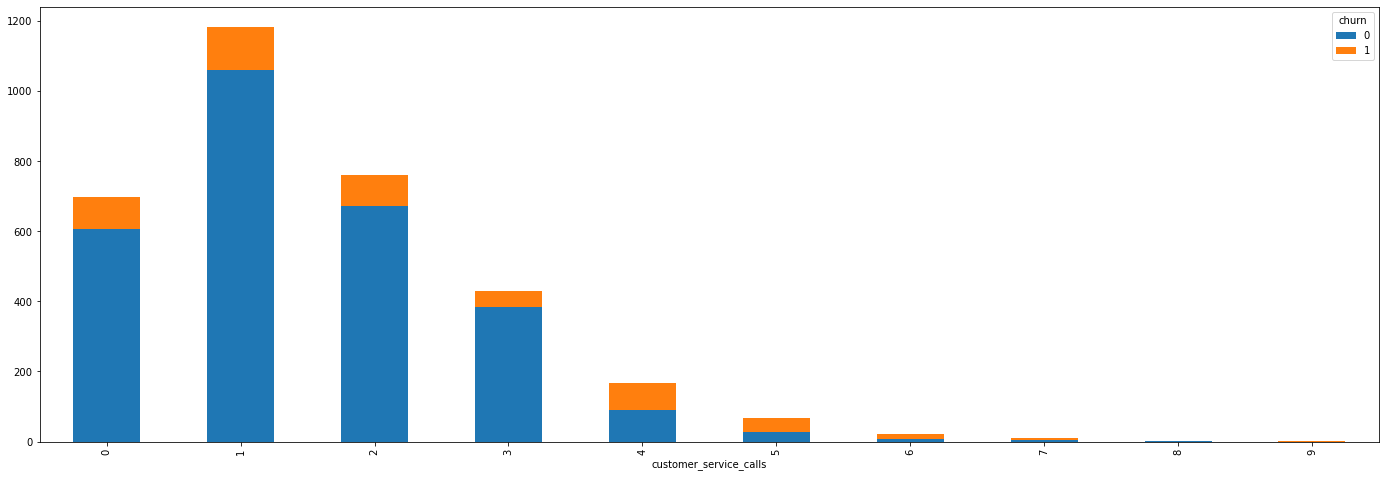

In [134]:
#Count of calls for our target
df.groupby(["customer_service_calls", "churn"]).size().unstack().plot(kind='bar', figsize=(24,8), stacked=True)

In [135]:
#Average churn % for 3 calls or less
cust_service_filter = df.loc[df['customer_service_calls'] < 4]
cust_service_filter['churn'].value_counts(normalize=True)

0    0.887476
1    0.112524
Name: churn, dtype: float64

In [136]:
#There appears to be a big increase in churn % at 4 calls
cust_service_filter = df.loc[df['customer_service_calls'] == 4]
cust_service_filter['churn'].value_counts(normalize=True)

0    0.542169
1    0.457831
Name: churn, dtype: float64

In [137]:
#Churn % at 5 calls
cust_service_filter = df.loc[df['customer_service_calls'] == 5]
cust_service_filter['churn'].value_counts(normalize=True)

1    0.606061
0    0.393939
Name: churn, dtype: float64

# Voicemail and International Plan

How do the usage of voicemail and an International plan affect a customer's likelihood to churn?

In [138]:
# How many churned customers had voicemails and weren't using them
print(churn_filter['voice_mail_plan'].value_counts(normalize=True))
print(current_filter['voice_mail_plan'].value_counts(normalize=True))

no     0.834369
yes    0.165631
Name: voice_mail_plan, dtype: float64
no     0.704561
yes    0.295439
Name: voice_mail_plan, dtype: float64


In [139]:
# % of overall customers with an International Plan
df['international_plan'].value_counts(normalize=True)

no     0.90309
yes    0.09691
Name: international_plan, dtype: float64

In [140]:
#Filter for people with Internation Plan
international = df.loc[df['international_plan'] == 'yes']

# % of customers with INTL Plan that churned
international['churn'].value_counts(normalize=True)

0    0.575851
1    0.424149
Name: churn, dtype: float64

In [141]:
# % of churned customers with an International plan
churn_filter['international_plan'].value_counts(normalize=True)

no     0.716356
yes    0.283644
Name: international_plan, dtype: float64

In [142]:
# % of current customers with an International plan
current_filter['international_plan'].value_counts(normalize=True)

no     0.934737
yes    0.065263
Name: international_plan, dtype: float64

# Location

In [197]:
#states sorted alphabetically
state_sorted = df['state'].value_counts().sort_index()
state_sorted

AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
Name: state, dtype: int64

In [198]:
#number of churned customers per state
churned_state_sorted = churn_filter['state'].value_counts().sort_index()
churned_state_sorted

AK     3
AL     8
AR    11
AZ     4
CA     9
CO     9
CT    12
DC     5
DE     9
FL     8
GA     8
HI     3
IA     3
ID     9
IL     5
IN     9
KS    13
KY     8
LA     4
MA    11
MD    17
ME    13
MI    16
MN    15
MO     7
MS    14
MT    14
NC    11
ND     6
NE     5
NH     9
NJ    18
NM     6
NV    14
NY    15
OH    10
OK     9
OR    11
PA     8
RI     6
SC    14
SD     8
TN     5
TX    18
UT    10
VA     5
VT     8
WA    14
WI     7
WV    10
WY     9
Name: state, dtype: int64

In [199]:
#% of customers churned by state
(churned_state_sorted / state_sorted).sort_values(ascending=False)

CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
ND    0.096774
NM    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: state, dtype: float64

# Modeling

Creating Train Test Split for intitial Dummy Model and First Basic Model

In [146]:
X = df.drop(['churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pipe!

Thank you David Elliott for providing much of the following code for efficiently processing our data.

In [147]:
#creates a stadardard scaler pipe for our numerical features
subpipe_num = Pipeline(steps=[
    ('ss', StandardScaler())
])

#creates a OHE pipe for our categorical features
subpipe_cat = Pipeline(steps=[
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [148]:
#takes our subpipes and applies them to our columns
#this will be called in each model
CT = ColumnTransformer(transformers=[
    ('subpipe_num', subpipe_num, selector(dtype_include=np.number)),
     ('subpipe_cat', subpipe_cat, selector(dtype_include=object))], remainder='passthrough')

# Various Model Pipes

In [149]:
#Dummy
dummy_model_pipe = Pipeline(steps=[
    ('ct', CT),
    ('dum', DummyClassifier(strategy='most_frequent'))
])

In [150]:
#Logistic Regression
logreg_model_pipe = Pipeline([
    ('ct', CT),
    ('logreg', LogisticRegression(random_state=19))
])

In [151]:
#KNN
knn_model_pipe = Pipeline([
    ('ct', CT),
    ('knn', KNeighborsClassifier())
])

In [152]:
#Random Forest
rfc_model_pipe = Pipeline([
    ('ct',CT),
    ('rfc',RandomForestClassifier(random_state=42))
])

In [153]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=5):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            {self.cv_mean:.5f} ± {self.cv_std:.5f} accuracy
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
         '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Thinner violinplot with higher bw
        sns.violinplot(y=self.cv_results, ax=ax, bw=.4)
        sns.swarmplot(
                y=self.cv_results,
                color='orange',
                size=10,
                alpha= 0.8,
                ax=ax
        )

        return ax

# Dummy Model

In [154]:
#train/test for dummy model
dummy_pipe = ModelWithCV(dummy_model_pipe, 'dummy_model', X_train, y_train)

In [155]:
dummy_pipe.print_cv_summary()

CV Results for `dummy_model` model:
            0.85674 ± 0.00091 accuracy
        


In [156]:
fig, ax = plt.subplots()

dummy_pipe.plot_cv(ax);

# Logistic Regression Model

In [157]:
#train/test split for Log Reg model
logreg_pipe = ModelWithCV(logreg_model_pipe, 'logreg_model', X_train, y_train)

In [158]:
logreg_pipe.print_cv_summary()

CV Results for `logreg_model` model:
            0.86034 ± 0.00959 accuracy
        


In [159]:
#fitting X_train/y_train to logreg_model_pipe
logreg_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc060ee3a30>),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc060ee3e80>)])),
                ('logreg', LogisticRegression(random_state=19))])

In [160]:
#scoring
logreg_model_pipe.score(X_train, y_train)

0.8715486194477791

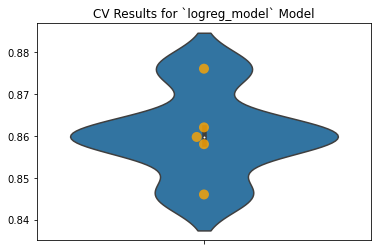

In [161]:
fig, ax = plt.subplots()

logreg_pipe.plot_cv(ax);

# KNN Model

In [162]:
#train/test split for KNN model
knn_pipe = ModelWithCV(knn_model_pipe, 'knn_model', X_train, y_train)

In [163]:
knn_pipe.print_cv_summary()

CV Results for `knn_model` model:
            0.88275 ± 0.00952 accuracy
        


In [164]:
knn_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc060ee3a30>),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc060ee3e80>)])),
                ('knn', KNeighborsClassifier())])

In [165]:
#KNN training score
knn_model_pipe.score(X_train, y_train)

0.9131652661064426

# KNN Model - Grid Search

In [166]:
#Using this to look at documentation for the various hyperparamaters
KNeighborsClassifier()

KNeighborsClassifier()

In [167]:
#Creating a hyperparameters dictionary to pass into our grid search for KNN Model
params = {}
params['knn__n_neighbors'] = [1, 3, 5, 7, 9]
params['knn__leaf_size'] = [20, 30, 40]
params['knn__metric'] = ['minkowski', 'manhattan']
params

{'knn__n_neighbors': [1, 3, 5, 7, 9],
 'knn__leaf_size': [20, 30, 40],
 'knn__metric': ['minkowski', 'manhattan']}

In [168]:
gs = GridSearchCV(knn_model_pipe,params,cv=5, verbose=1)

In [169]:
#This can take a few minutes to run depending on the number of fits
gs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   18.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fc060ee3a30>),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                    

In [170]:
#best parameters for KNN Grid Search
gs.best_params_

{'knn__leaf_size': 20, 'knn__metric': 'manhattan', 'knn__n_neighbors': 5}

In [171]:
#KNN training set gridsearch score
gs.score(X_train, y_train)

0.9095638255302121

In [172]:
#KNN gridsearch cross val results
gs.cv_results_['mean_test_score'].mean()

0.8760276553106212

In [173]:
#KNN gridsearch best test score
gs.score(X_test, y_test)

0.8908872901678657

# RFC Model

In [174]:
rfc_pipe = ModelWithCV(rfc_model_pipe, 'rfc_model', X_train, y_train)

rfc_pipe.print_cv_summary()

CV Results for `rfc_model` model:
            0.93678 ± 0.00626 accuracy
        


In [175]:
rfc_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc060ee3a30>),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc060ee3e80>)])),
                ('rfc', RandomForestClassifier(random_state=42))])

In [176]:
#Getting feature importance for RFC model
rfc_model_pipe['rfc'].feature_importances_
feat_import = {name: score 
                   for name, score 
                       in zip(X_train.columns, rfc_model_pipe['rfc'].feature_importances_)
}
feat_import

{'state': 0.029042181086281777,
 'account_length': 0.009459144681039752,
 'area_code': 0.016000529314067494,
 'international_plan': 0.11148760360437014,
 'voice_mail_plan': 0.03470336701944486,
 'number_vmail_messages': 0.12794152083338461,
 'total_day_minutes': 0.05644913860057341,
 'total_day_calls': 0.029934947940131722,
 'total_day_charge': 0.057054672529405694,
 'total_eve_minutes': 0.035954185572800286,
 'total_eve_calls': 0.03294372624257793,
 'total_eve_charge': 0.03844148360772133,
 'total_night_minutes': 0.043285598791316354,
 'total_night_calls': 0.0403815995685038,
 'total_night_charge': 0.04036779095504825,
 'total_intl_minutes': 0.10544085137557391,
 'total_intl_calls': 0.0006717243805147596,
 'total_intl_charge': 0.0008522327053984851,
 'customer_service_calls': 0.0026584533229161217}

In [177]:
type(feat_import)

dict

In [178]:
features = list(feat_import.keys())
values = list(feat_import.values())

In [179]:
plt.barh(range(len(feat_import)), values, tick_label=features)
plt.xlabel("Weight of Features")

Text(0.5, 0, 'Weight of Features')

In [180]:
#creating two lists to look at top values and features for RFC
values = []
features = []
for x in feat_import:
    if feat_import[x] > .05:
        features.append(x)
        values.append(feat_import[x])

In [181]:
features

['international_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_charge',
 'total_intl_minutes']

In [182]:
values

[0.11148760360437014,
 0.12794152083338461,
 0.05644913860057341,
 0.057054672529405694,
 0.10544085137557391]

In [183]:
#ogranizing features for better bar chart
features_1 = ['total_day_minutes',
 'total_day_charge',
 'total_intl_minutes', 'international_plan',
 'number_vmail_messages']
values_1 = [0.05644913860057341, 0.057054672529405694, 0.10544085137557391, 0.11148760360437014, 0.12794152083338461]

Text(0.5, 0, 'Weight of Features')

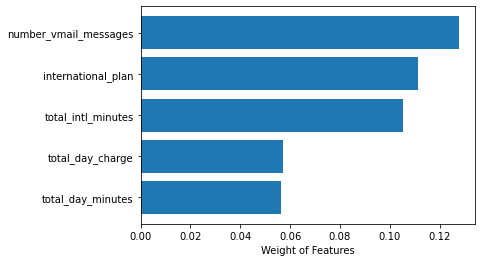

In [184]:
plt.barh(range(len(values_1)), values_1, tick_label=features_1)
plt.xlabel("Weight of Features")

In [185]:
#RFC model predicting churn
y_hat = rfc_model_pipe.predict(X_test)

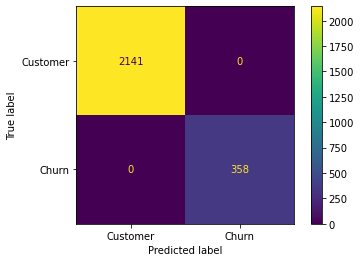

In [194]:
#Confusion matrix for RFC Model
plot_confusion_matrix(rfc_model_pipe, X_train, y_train, display_labels=['Customer','Churn'])

In [196]:
#Final Model Results
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 2)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat), 2)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat), 2)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat), 2)}.
""")


Our final model's accuracy on the test set is 0.94. 

Our final model's recall on the test set is 0.62 

Our final model's precision on the test set is 0.99 

Our final model's f1-score on the test is 0.76.



# Extra - Gradient Boosting

In [187]:
gbc = GradientBoostingClassifier(random_state=42)

gbc_model_pipe = Pipeline([('ct', CT), ('gbc',gbc)])

In [188]:
gbc_pipe = ModelWithCV(gbc_model_pipe, 'gbc_model', X_train, y_train)

gbc_pipe.print_cv_summary()

CV Results for `gbc_model` model:
            0.94958 ± 0.00583 accuracy
        


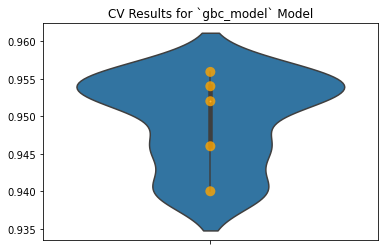

In [189]:
fig, ax = plt.subplots()

gbc_pipe.plot_cv(ax);